# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.052521e+01     8.051907e+00
 * time: 0.001828908920288086
     1     2.735939e+01     3.956234e+00
 * time: 0.008224964141845703
     2     1.856304e+01     3.846559e+00
 * time: 0.01571488380432129
     3     1.216944e+01     2.288463e+00
 * time: 0.022827863693237305
     4     1.198428e+01     2.732186e+00
 * time: 0.028534889221191406
     5     1.099849e+01     2.214414e+00
 * time: 0.03428077697753906
     6     1.018578e+01     1.724806e+00
 * time: 0.04002690315246582
     7     9.548606e+00     1.826526e+00
 * time: 0.04585695266723633
     8     8.984037e+00     1.566307e+00
 * time: 0.051962852478027344
     9     8.550250e+00     1.133608e+00
 * time: 0.05805492401123047
    10     8.319009e+00     6.315927e-01
 * time: 0.09364080429077148
    11     8.207255e+00     3.930192e-01
 * time: 0.09827399253845215
    12     8.136643e+00     3.389610e-01
 * time: 0.1028139591217041
    13     8.096655e+00     4.038294e-01
 * t

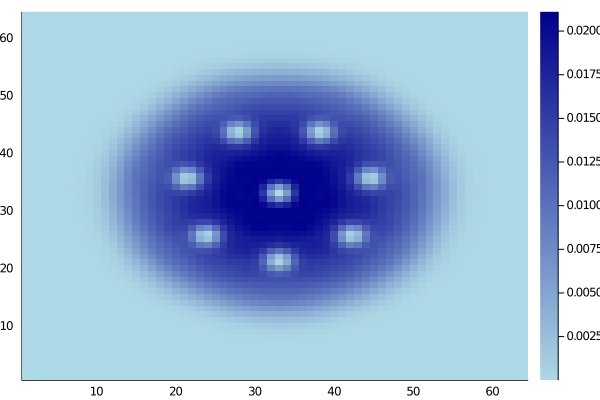

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)